In [2]:
from util import load_model
from lp_detection import lp_detect
from align_lp import align_lp
from lp_recognition import lp_recognition
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [8]:
lp_detect_model = load_model("model/best_lp_detect.pt").cpu()
corner_detect_model = load_model("model/best_corner_detect.pt").cpu()
lp_recognition_model = load_model("model/best_lp_recognition.pt").cpu()

In [20]:
def show_recognition(
    img_path, 
    lp_detect_model=lp_detect_model, 
    corner_detect_model=corner_detect_model, 
    lp_recognition_model=lp_recognition_model, 
    mode="hough",
    is_show=False
):
    img = cv2.imread(img_path)
    lps, coords, _ = lp_detect(img, lp_detect_model, save=False)
    contents = []
    img_copy = img.copy()
    if len(lps) != 0:
        for lp in lps:
            lp_align = align_lp(mode, lp, corner_detect_model, save=False)
            # print(lp_recognition(lp_align, lp_recognition_model))
            contents.append(lp_recognition(lp_align, lp_recognition_model))
        if is_show:
            for (coord, content) in zip(coords, contents):
                cv2.rectangle(img_copy, (coord[0], coord[1]), (coord[2], coord[3]), (0, 0, 255), 2)
                cv2.putText(img_copy, content, (coord[0], coord[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
    if is_show:      
        plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
        plt.show()

In [23]:
%%timeit 
show_recognition(img_path = "example/0046_01762_b.jpg")

304 ms ± 22.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


51F59011


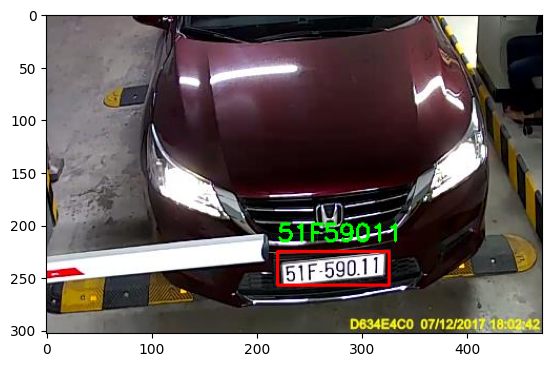

In [7]:
show_recognition(img_path = "example/41224.jpg")

516D 74372


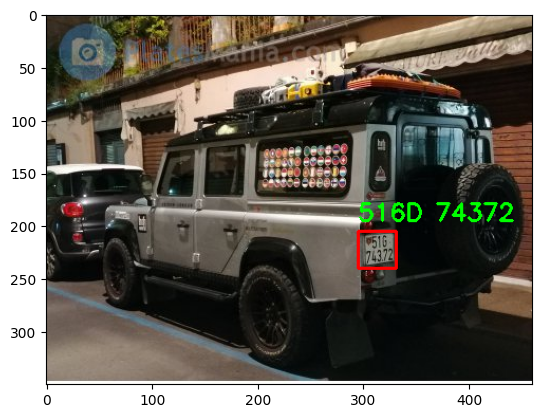

In [8]:
show_recognition(img_path = "example/13725882.jpg")

30Z9599


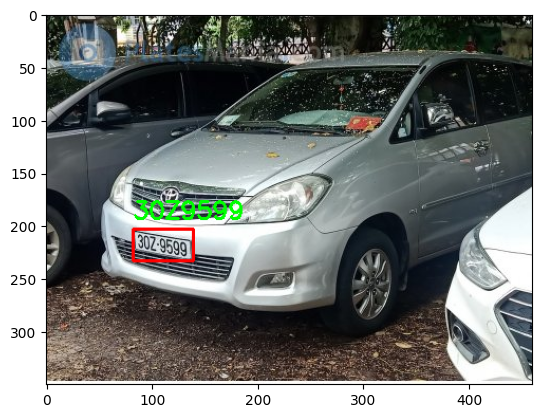

In [9]:
show_recognition(img_path = "example/22518372.jpg")

55X8 6135
60B5 79769


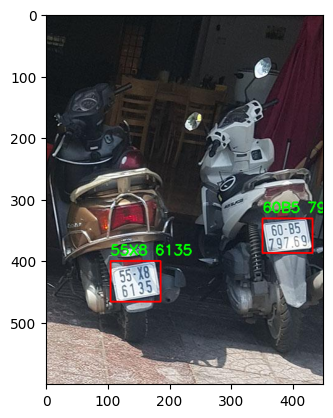

In [11]:
show_recognition(img_path = "example/Dieu_0020.png")